# CNN_모델 설계 및 학습

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam

my_epochs=20

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
print(cnn.summary())

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=my_epochs, validation_data=(x_test,y_test))

cnn.save('cnn_v2.h5')

res = cnn.evaluate(x_test,y_test)
print("정확율 :",res[1]*100)

2025-09-24 12:43:45.222103: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-24 12:43:45.222171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-24 12:43:45.223532: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-24 12:43:45.231223: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-24 12:43:46.332559: W tensorflow/compiler/tf2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         


2025-09-24 12:43:48.731553: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-09-24 12:43:49.668207: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
          

2025-09-24 12:43:50.069301: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
469/469 [==============================] - 52s 112ms/step - loss: 0.2311 - accuracy: 0.9268 - val_loss: 0.0423 - val_accuracy: 0.9869
Epoch 2/20
469/469 [==============================] - 46s 99ms/step - loss: 0.0683 - accuracy: 0.9790 - val_loss: 0.0255 - val_accuracy: 0.9913
Epoch 3/20
469/469 [==============================] - 48s 103ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0291 - val_accuracy: 0.9905
Epoch 4/20
469/469 [==============================] - 43s 92ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0229 - val_accuracy: 0.9927
Epoch 5/20
469/469 [==============================] - 43s 91ms/step - loss: 0.0320 - accuracy: 0.9904 - val_loss: 0.0187 - val_accuracy: 0.9941
Epoch 6/20
469/469 [==============================] - 45s 95ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0225 - val_accuracy: 0.9925
Epoch 7/20
469/469 [==============================] - 44s 95ms/step - loss: 0.0275 - accuracy: 0.9908 - val_loss: 0.0148 - val_accurac

/home/devna0111/miniconda3/envs/dl/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 7ms/step - loss: 0.0211 - accuracy: 0.9942
정확율 : 99.41999912261963


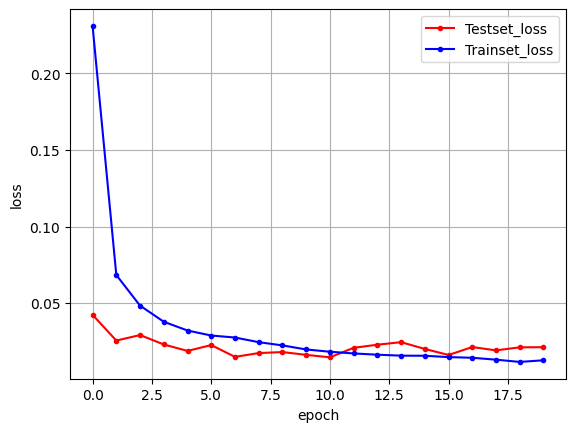

In [2]:
import matplotlib.pyplot as plt
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [4]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt

In [5]:
model = tf.keras.models.load_model('cnn_v2.h5')

In [14]:
def reset() :
    global img
    
    img = np.ones((200,520,3),dtype=np.uint8)*255
    for i in range(5) :
        cv.rectangle(img, (10+i*100,50), (10+(i+1)*100,150),(0,0,255))
    cv.putText(img, 
               'e : erase // s : show // r : recognition // q : quit', (10,40),
               cv.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)

def grab_numerals() :
    numerals = []
    for i in range(5) :
        roi = img[51:149, 11+i*100:9+(i+1)*100,0]
        roi = 255-cv.resize(roi,(28,28),interpolation=cv.INTER_CUBIC)
        numerals.append(roi)
    numerals = np.array(numerals)
    return numerals

def show() :
    numerals = grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5) :
        plt.subplot(1,5,i+1)
        plt.imshow(numerals[i],cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()

def recognition() :
    numerals = grab_numerals()
    numerals = numerals.reshape(5,28,28,1)
    numerals = numerals.astype(np.float32)/255.0
    res = model.predict(numerals)
    print(res)
    class_id = np.argmax(res, axis=1)
    print(class_id)
    for i in range(5) :
        cv.putText(img, str(class_id[i]),(50+i*100,180),cv.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),1)
    # winsound.Beep(1000,500)
    
BrushSiz=4
LColor=(0,0,0)

def writing(event,x,y,flags,param) :
    if event == cv.EVENT_LBUTTONDOWN :
        cv.circle(img,(x,y),BrushSiz,LColor,-1)
    elif event == cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON :
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing', writing)

while True :
    cv.imshow('Writing',img)
    key = cv.waitKey(1)
    if key == ord('e') :
        reset()
    elif key == ord('s') :
        show()
    elif key == ord('r') :
        recognition()
    elif key == ord('q') :
        break
    
cv.destroyAllWindows()

1/1 [==============================] - 0s 17ms/step
[[2.53936811e-03 9.34892595e-01 1.23092625e-03 3.93571216e-04
  1.03548367e-03 2.61334460e-02 2.18985397e-02 4.02293867e-03
  7.08729960e-03 7.65836856e-04]
 [1.58559487e-07 2.38986195e-06 9.98436153e-01 1.29370729e-03
  1.72542656e-07 1.03109632e-09 2.54919552e-09 2.63570662e-04
  3.38047516e-06 3.99429041e-07]
 [1.45066308e-03 3.24010514e-02 1.33721501e-01 7.31177628e-01
  1.43602593e-02 5.95625788e-02 1.15328934e-04 1.80880371e-02
  8.97444226e-03 1.48468069e-04]
 [4.15158831e-03 5.76322840e-04 5.28609455e-02 8.08933564e-03
  3.02589417e-01 2.07506157e-02 1.94014963e-02 2.07667938e-03
  1.26904696e-01 4.62598920e-01]
 [5.58109195e-06 1.56860315e-05 1.75976106e-06 1.13461399e-04
  4.63725564e-06 9.96997952e-01 1.60645868e-05 6.19120271e-07
  3.44421976e-04 2.49977666e-03]]
[1 2 3 9 5]
1/1 [==============================] - 0s 17ms/step
[[2.53936811e-03 9.34892595e-01 1.23092625e-03 3.93571216e-04
  1.03548367e-03 2.61334460e-02 2.18